Copy your API token (on the webpage click `COPY`) and paste it in the cell below.
> &#9888;&#65039; It is a new way of using the token!

In [2]:
token = 'DEV-b4c56900cac9868d4945308494feaba866a912e6'

Make all the necessary imports as explained in `Ising_Problem_AQC.ipynb`.

In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install dwave-ocean-sdk && dwave config create

In [5]:
from dwave.cloud import Client
with Client.from_config(token=token) as client:
  available_solvers = client.get_solvers()

for solver in available_solvers:
  print(solver)

BQMSolver(id='hybrid_binary_quadratic_model_version2')
DQMSolver(id='hybrid_discrete_quadratic_model_version1')
StructuredSolver(id='Advantage_system4.1')
CQMSolver(id='hybrid_constrained_quadratic_model_version1')
StructuredSolver(id='Advantage_system6.4')
StructuredSolver(id='Advantage2_prototype2.3')


In [6]:
from dwave.cloud import Client
with Client.from_config(token=token) as client:
  solver = client.get_solver('Advantage_system6.4')   # SELECT THE SOLVER

# QUBO problems


> 📖 **QUBO:** **Q**uadratic **U**nconstrained **B**inary **O**ptimization


QUBO problems are traditionally used in computer science, hence their importance along with Ising problems. The variables $x_i$ can take values $1$ (`True`) or $0$ (`False`).

QUBO problems are *unconstrained* in that there are no constraints on the variables other than those expressed in $Q$.

A QUBO problem is defined using an upper-diagonal matrix $Q$, which is an $N\times N$ matrix with real weights. The associated optimization problem requires the minimization of an energy function $E_P$ written as follows:
$$
\min_{x\in\lbrace 0,1 \rbrace^N} E_P(x)\quad\text{where}\quad E_P
    =  \sum_{i\le j} x_i Q_{ij} x_j
    \qquad\qquad x_i\in \{0,1\}
$$

And we have

$$
E_P = \begin{pmatrix}
x_1 & x_2 & \cdots & x_n
\end{pmatrix}
Q
\begin{pmatrix}
x_1 \\ x_2 \\ \vdots \\ x_n
\end{pmatrix}
$$

> &#9888;&#65039; **Notice!** For any binary variable $x_i$ we have $(x_i)^2 = x_i$

The QUBO problem is of great significance in various fields, including optimization, operations research, machine learning, and quantum computing. It serves as a fundamental building block for solving many real-world optimization problems, such as resource allocation, logistics planning, and scheduling.

## Logic Gates on Adiabatic Quantum Computers

### Logic AND

The logic gate AND has truth table

| input 1 | input 2 | output |
| :-----: | :-----: | :----: |
| 0       | 0       | 0      |
| 0       | 1       | 0      |
| 1       | 0       | 0      |
| 1       | 1       | 1      |

Consider all possible configurations of 3 binary variables ($2^3=8$ configurations):


| x1   | x2   | x3   |
| :--: | :--: | :--: |
| **0** | **0** | **0** |
| 0    | 0    | 1    |
| **0** | **1** | **0** |
| **1** | **0** | **0** |
| 0    | 1    | 1    |
| 1    | 0    | 1    |
| 1    | 1    | 0    |
| **1** | **1** | **1** |

I have highlighted the solution configurations in bold.

Now we need to find a cost function (aka energy function) which evaluates at a lower value for assignments of variables that match valid states of the gate (in bold), and higher values for invalid assignments of variables (not in bold)

Consider the following function:

$$
E = 3x_3 + x_1x_2 -2x_1x_3 -2x_2x_3
$$

##### **Exercise 1**

Evaluate the energy of each configuration, using the above expression. Which configuration has lowest energy?

Click this cell and fill the energy column (instead of the # symbol):

| x1   | x2   | x3      | E     |
| :--: | :--: | :--:    | :--:  |
| **0** | **0** | **0** |   #   |
| 0    | 0    | 1       |   #   |
| **0** | **1** | **0** |   #   |
| **1** | **0** | **0** |   #   |
| 0    | 1    | 1       |   #   |
| 1    | 0    | 1       |   #   |
| 1    | 1    | 0       |   #   |
| **1** | **1** | **1** |   #   |

The function $E$ is quadratic, since it only involves product of two variables at most, and the variables are binary, i.e. only take 0 or 1 values. This means that we have formulated our first QUBO problem!

In matrix form it may be represented as

$$
Q =
\begin{pmatrix}
0 & 1 & -2  \\
  & 0 & -2  \\
  &   & 3   
\end{pmatrix}
$$

It is now time to write in Python such a QUBO problem: just write `Q` as a dictionary!

In [9]:
Q = {('x1', 'x2'): 1, ('x1', 'x3'): -2, ('x2', 'x3'): -2, ('x3', 'x3'): 3}

Now we can solve the problem by calling the DWave computer. This time we call the `sample_qubo` method!

In [7]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = DWaveSampler(token=token, solver='Advantage_system6.4')
sampler_embedded = EmbeddingComposite(sampler)

In [10]:
sampleset = sampler_embedded.sample_qubo(Q, num_reads=100, label='AND gate')

print(sampleset)

  x1 x2 x3 energy num_oc. chain_.
0  0  1  0    0.0      19     0.0
1  1  0  0    0.0      27     0.0
2  0  0  0    0.0      44     0.0
3  1  1  1    0.0      10     0.0
['BINARY', 4 rows, 100 samples, 3 variables]


### Logic NOT

##### **Exercise 2**

Write the QUBO problem associated with the NOT logic gate, which has the following truth table:

| input  | output |
| :----: | :----: |
| 0      | 1      |
| 1      | 0      |

> &#128161; To practice with different attempts I suggest you to write down here the cost function (you can use $\LaTeX$ typescripting)

$$
E = - x_1 -x_2 +2x_1x_2
$$

and check the energy of each configuration:

| x1    | x2    | $E$ |
| :--:  | :--:  |:---:|
| 0     | 0     |  0  |
| **0** | **1** | -1  |
| **1** | **0** | -1  |
| 1     | 1     |  0  |

So starting from an initial guess $E_1$ we managed to find an good cost function $E_2$.

Afterwards write the relative dictionary `Q`:

In [11]:
Q = {('x1', 'x1'): -1 ,('x1', 'x2'): 2, ('x2', 'x2'): -1}

In [12]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = DWaveSampler(token=token, solver='Advantage_system6.4')
sampler_embedded = EmbeddingComposite(sampler)
sampleset = sampler_embedded.sample_qubo(Q, num_reads=100, label='NOT gate')

print(sampleset)

  x1 x2 energy num_oc. chain_.
0  0  1   -1.0      37     0.0
1  1  0   -1.0      63     0.0
['BINARY', 2 rows, 100 samples, 2 variables]


If you want to convert QUBO problems to Ising, you can use python library `dimod`, which has the method `dimod.qubo_to_ising()`.

## Minor-Embedding \& Chains

Because the D-Wave System is graph-structured but most problems of application interest are not, it is convenient to be able to map from a structured sampler to an unstructured one.
A structured sampler is one that can only solve problems that map to a specific graph (Pegasus or Chimera).

The most adventurous ones of you can find more details in [Minor-Embedding in Adiabatic Quantum Computation](https://arxiv.org/abs/0804.4884).

Consider the following QUBO problem:

$$
2ab + 2ac + 2bc - a - b - c
$$

Which has a triangular complete graph representation of dimension 3, so it is called $K_3$.

To understand how chaining qubits overcomes the problem of sparse connectivity, consider minor embedding such graph into two target graphs, one sparser than the other.
I show you two such embeddings in the figure below: the triangular graph is mapped on the left to a fully-connected graph of four nodes (called a
$K_4$ complete graph ) and on the right to a sparser graph, also of four nodes.

![img](https://github.com/dwavesystems/dwave-ocean-sdk/blob/master/docs/_images/chain_triangle_four_qubits.png?raw=true)

For the left-hand embedding, you can choose any mapping between {a,b,c} and {0,1,2,3}.
For example, here {a,b,c} are mapped to {2,0,1}, respectively.

For the right-hand embedding, however, no choice of just three target nodes suffices!
The same {2,0,1} target nodes leaves b disconnected from c.
**Chaining** target nodes 0 and 3 to represent node b makes use of both the connection between 0 to 2 and the connection between 3 and 1.

On QPUs, chaining qubits is accomplished by setting the strength of their connecting couplers negative enough to strongly correlate the states of the chained qubits;
if at the end of most anneals these qubits are in the same classical state, representing the same binary value in the objective function,
they are in effect acting as a single variable.

With the old Chimera topology it was impossible to map the AND QUBO problem with only 3 physical qubits. Now that the `Advantage System` upgraded to Pegasus topology, embedding a complete graph of size 3 is not a problem anymore.

> The `EmbeddingComposite` uses the `minorminer` library to map unstructured problems to a structured sampler.

##### **Exercise 3**
Build a complete graph of size N (small of your choice). Then convert it to QUBO problem and set the couplings to 0 or 1 randomly.

Find the embedding with `find_embedding()` (you can find everything in the previous lesson). Print the embedding.

1. How many qubits do you need? More or equal than N?
2. What is the maximum size N of a complete graph that uses only N physical qubits?

> &#128161; **Hint:** You can use the `networkx` library OR the `itertools` library. Feel free to explore!

In [16]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import FixedEmbeddingComposite
from minorminer import find_embedding
import random
import networkx as nx
import matplotlib as plt


sampler = DWaveSampler(token=token, solver='Advantage_system6.4')

__, target_edgelist, target_adjacency = sampler.structure

N= 4
#Q = {('x1', 'x1'): -1 ,('x2', 'x2'): -1, ('x3', 'x3'): -1, ('x1', 'x2'): 2, ('x1', 'x3'): 2, ('x2', 'x3'): 2}



The `itertools` way

In [ ]:
import itertools

###

The `networkx` way

{0: [206], 1: [191], 2: [4935], 3: [4920]}

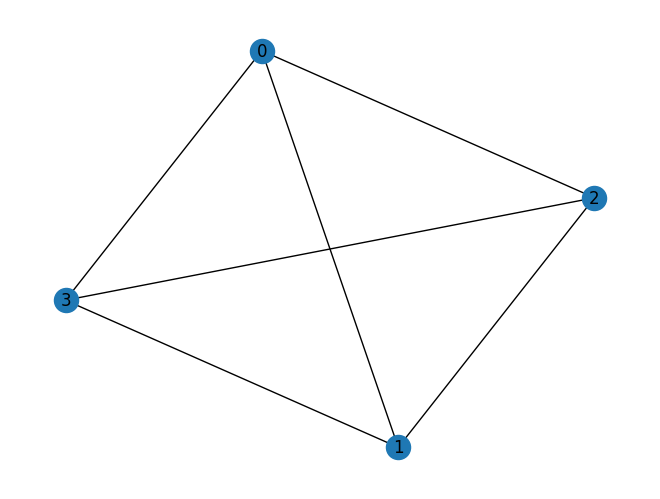

In [27]:
import networkx as nx

###
G = nx.complete_graph(N)
nx.draw(G, with_labels=True)

G.add_edges_from([
  (0,1, {'sign': random.choice([0,1])}),
  (0,2, {'sign': random.choice([0,1])}),
  (0,3, {'sign': random.choice([0,1])}),
  (1,2, {'sign': random.choice([0,1])}),
  (1,3, {'sign': random.choice([0,1])}),
  (2,3, {'sign': random.choice([0,1])}),
])

emb = find_embedding(G, target_edgelist, verbose= 1 )
emb

For long chains, it is possible to run into some broken chains.
> 🖐️ Raise your hand if you find a broken chain!

## Constrained Optimization

The QUBO formulation is very powerful, since it let you implement also **constrained** problems by simply adding a penalty function!

If you don't believe me go back at the previous section... what is a chain? Yes it is basically a constraint!
So you already solved a constrained binary optimization problem, without even noticing it!

In this section we are going to solve a constrained problem with a little more attention. The main point is finding a proper penalty function!

Let's start from a simple equation. Consider three variables $x_1,\, x_2,\, x_3$ and the following equation:

$$
x_1 + x_2 + x_3 = 3
$$

The solution is trivial (all binaries equal to $1$), but if you want to use an adiabatic quantum computer in order to solve it you must write it as a minimization problem.
Therefore you need the canonical form of the equation you want to solve: in this example the equation rewrites

$$
f(x_1, x_2, x_3) = 3 - x_1 - x_2 - x_3 \le 0
$$
where the equality holds when the solution is met.

The minimization problem is
$$
\min_{x_1, x_2, x_3} = f(x_1, x_2, x_3)
$$
and the solution of the starting equation is then $\arg \min f$.


##### **Exercise 4**

There is another way of expressing $f(x_1, x_2, x_3)$ (which one?), but why didn't we use it?

*Answer:* ???

More tips on how to formulate a problem at the page [Reformulating a Problem](https://docs.dwavesys.com/docs/latest/handbook_reformulating.html)

### HUBO problems


> 📖 **HUBO:** **H**igher-order **U**nconstrained **B**inary **O**ptimization


An interesting example of constrained problem is the formulation of a Higher-order Binary Optimization (HUBO) problem, as a QUBO!

Consider the following HUBO problem:
$$
E_P = x_1x_2x_3 - x_1x_2 + x_3
$$

The term $x_1x_2x_3$ makes $E_P$ cubic and not quadratic anymore.
Luckily for us, we have all the needed knowledge to solve such a problem on the DWave quantum computer, even if it only accept quadratic problems.

In this section we will learn how to reduce the degree of a polinomial optimization problem.

> Before continuing, Can you think a way out by yourself?

A clever way is defining a new variable
$$
x_4 = x_2x_3
$$

and substitute it into $E_P$. You have now
$$
\widetilde{E}_P = x_1x_4 - x_1x_2 + x_3
$$
which is quadratic! But now we have a quadratic *constrained* (on $x_4$) binary optimization problem. Hence we need to enforce the constraint as a penalty function.
Consider all possible cases:

| $x_2$ | $x_3$ | $x_4$|
| :--:  | :--:  | :--: |
| 0     | 0     |   0  |
|     0 |     1 |   0  |
|     1 |     0 |   0  |
| 1     | 1     |   1  |

Wait a second... this is the AND gate! As a matter of fact the AND gate can be thought of as the product of the two binary variables. So we already know the penalty function for this constraint:

$$
f(x_2, x_3, x_4) = 3x_4 + x_2x_3 -2x_2x_4 -2x_3x_4
$$

and the problem can be finally written as a QUBO
$$
E_P = \underbrace{x_1x_4 - x_1x_2 + x_3}_{\text{objective}} + \underbrace{3x_4 + x_2x_3 -2x_2x_4 -2x_3x_4}_{\text{penalty term (constraint)}}
$$


In matrix form it becomes
$$
Q =
\begin{pmatrix}
0 & -1 & -2 & 1  \\
  & 0 & 1   & -2  \\
  &   & 1   & -2  \\
  &   &     & 3  
\end{pmatrix}
$$

##### **Final Exercise**

Solve the following HUBO with the DWave Advantage System

$$
E_P = x_1 x_2 x_3 x_4
$$

*Solution:*
$$
E_P = x_5x_6 + (3x_5 + x_1x_2 - 2x_1x_5 - 2x_2x_5) + (3x_6 + x_3x_4 - 2x_3x_6 - 2x_4x_6)
$$
In matrix form becomes:
$$
Q = 
$$

In [30]:
Q = {('x5','x6'): 1, ('x5','x5'): 3, ('x1','x2'): 1, ('x1','x5'): -2, ('x2','x5'): -2, ('x6','x6'): 3,
('x3','x4'): 1, ('x3','x6'): -2, ('x4','x6'): -2}

In [32]:
sampler = DWaveSampler(token=token, solver='Advantage_system6.4')
sampler_embedded = EmbeddingComposite(sampler)
sampleset = sampler_embedded.sample_qubo(Q, num_reads=1000, label='HUBO problem')

print(sampleset)

   x1 x2 x3 x4 x5 x6 energy num_oc. chain_.
0   0  1  0  1  0  0    0.0      21     0.0
1   1  0  1  1  0  1    0.0      51     0.0
2   1  1  0  1  1  0    0.0      34     0.0
3   1  0  0  0  0  0    0.0      38     0.0
4   0  1  0  0  0  0    0.0      42     0.0
5   1  1  0  0  1  0    0.0      93     0.0
6   0  0  0  1  0  0    0.0      53     0.0
7   0  0  0  0  0  0    0.0     117     0.0
8   1  0  1  0  0  0    0.0      37     0.0
9   0  0  1  1  0  1    0.0     221     0.0
10  1  0  0  1  0  0    0.0      19     0.0
11  0  1  1  1  0  1    0.0      77     0.0
12  1  1  1  0  1  0    0.0      52     0.0
13  0  0  1  0  0  0    0.0     107     0.0
14  0  1  1  0  0  0    0.0      38     0.0
['BINARY', 15 rows, 1000 samples, 6 variables]


Interpret the results.